### COMP257 | Assignment3: Hierachical Clustering
#### Author: Youung Park | ID: 301200413

In [2]:
# 1. Retrieve and load the Olivetti faces dataset

from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

In [3]:
# 2. Split the training set, a validation set and a test set using a stratified sampling.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.2, random_state=13, stratify=faces.target)

In [4]:
# 3. Using k-fold cross-validation, train a classifier to predict which person is presented in each picture, and evaluate it on the validation set.

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=13)
scores = cross_val_score(rf_clf, X_train, y_train, cv=3)
print(scores.mean())


0.9061012167166286


In [5]:
# 4. Using either Agglomerative Hierarchical Clustering or Divisive Hierachical Clustering and complete linkage, reduce the dimensionality of the set by using the following similiarity measures:
#    - Euclidean distance

from sklearn.cluster import AgglomerativeClustering

# agg_clustering_euclidean = AgglomerativeClustering(n_clusters=40, affinity='euclidean', linkage='complete')
# y_pred_euclidean = agg_clustering_euclidean.fit_predict(X_train)

#    - Manhattan Distance

# agg_clustering_manhattan = AgglomerativeClustering(n_clusters=40, affinity='manhattan', linkage='complete')
# y_pred_manhattan = agg_clustering_manhattan.fit_predict(X_train)

#    - Cosine Similarity

from sklearn.metrics.pairwise import cosine_similarity

# agg_clustering_cosine = AgglomerativeClustering(n_clusters=40, affinity='precomputed', linkage='complete')
# y_pred_cosine = agg_clustering_cosine.fit_predict(cosine_similarity(X_train))



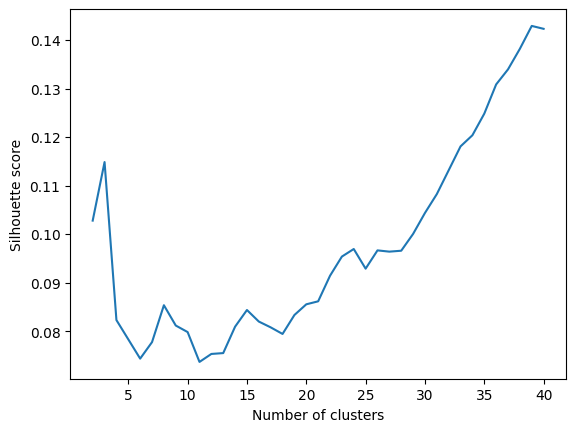

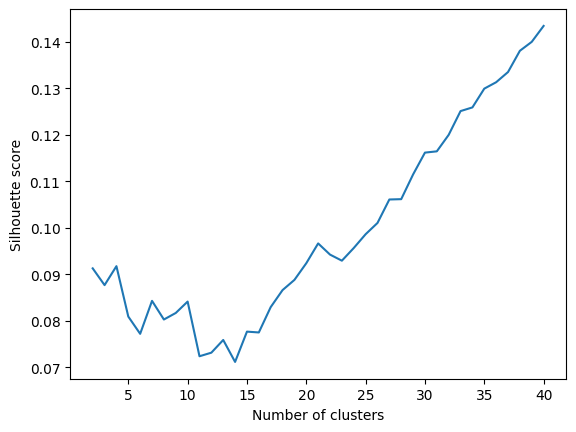

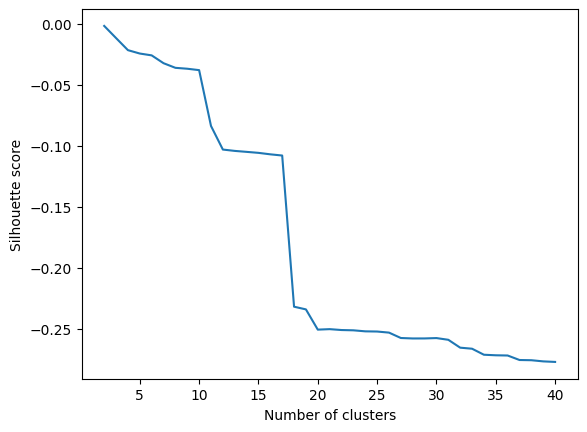

In [6]:
# 5. Use the silhouette score to find the best number of clusters for each of the three similarity measures.
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Euclidean distance
silhouette_scores = []
for n_clusters in range(2, 41):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='complete')
    y_pred = agg_clustering.fit_predict(X_train)
    silhouette_scores.append(silhouette_score(X_train, y_pred))

plt.plot(range(2, 41), silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

# Manhattan distance
silhouette_scores = []
for n_clusters in range(2, 41):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='manhattan', linkage='complete')
    y_pred = agg_clustering.fit_predict(X_train)
    silhouette_scores.append(silhouette_score(X_train, y_pred))

plt.plot(range(2, 41), silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

# Cosine similarity
silhouette_scores = []
for n_clusters in range(2, 41):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='complete')
    y_pred = agg_clustering.fit_predict(cosine_similarity(X_train))
    silhouette_scores.append(silhouette_score(X_train, y_pred))

plt.plot(range(2, 41), silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

In [9]:
# 6. Use the set from the previous step to train a classifier using k-fold cross-validation.

# Euclidean distance
agg_clustering = AgglomerativeClustering(n_clusters=38, affinity='euclidean', linkage='complete')
y_pred = agg_clustering.fit_predict(X_train)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=13)
scores = cross_val_score(rf_clf, X_train, y_pred, cv=3)
print(scores.mean())

# Manhattan distance
agg_clustering = AgglomerativeClustering(n_clusters=40, affinity='manhattan', linkage='complete')
y_pred = agg_clustering.fit_predict(X_train)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=13)
scores = cross_val_score(rf_clf, X_train, y_pred, cv=3)
print(scores.mean())

# Cosine similarity
agg_clustering = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='complete')
y_pred = agg_clustering.fit_predict(cosine_similarity(X_train))
rf_clf = RandomForestClassifier(n_estimators=100, random_state=13)
scores = cross_val_score(rf_clf, X_train, y_pred, cv=3)
print(scores.mean())




c:\Users\bnmhj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


0.8311585258331863


c:\Users\bnmhj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


0.8250161641097984
0.44704049844236754
